<a href="https://colab.research.google.com/github/MonikaLamba/DEEPLEARNING/blob/master/GSE25066_PDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('/content/GSE25066_SELECTED_GENES_AFTER_CONSISTENCY_BFS_1.csv')


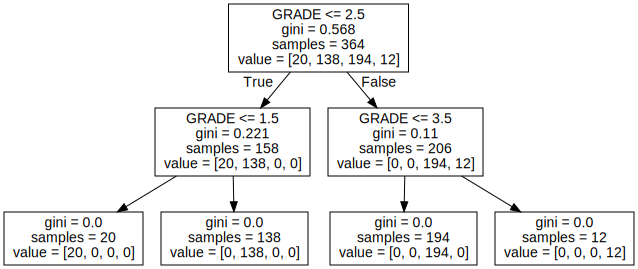

In [5]:
y = (data['GRADE'])  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)


In [3]:
feature_names

['L13386',
 'NM_001002',
 'NM_002266',
 'NM_002380',
 'NM_004124',
 'NM_001255',
 'NM_002691',
 'NM_003256',
 'NM_004694',
 'NM_005196',
 'BC005884',
 'GRADE']

In [4]:
X

,L13386,NM_001002,NM_002266,NM_002380,NM_004124,NM_001255,NM_002691,NM_003256,NM_004694,NM_005196,BC005884,GRADE
0,0.162867,0.472750,0.602802,0.557936,0.533891,0.514257,0.656878,0.276238,0.624122,0.576233,0.446695,2
1,0.199140,0.671788,0.709978,0.817912,0.592438,0.434342,0.580327,0.273694,0.318294,0.634215,0.318076,2
2,0.473702,0.269579,0.825387,0.452919,0.425767,0.822751,0.754042,0.271077,0.343602,0.774901,0.653781,3
3,0.310454,0.254374,0.881420,0.517289,0.564659,0.685130,0.742174,0.519560,0.471322,0.972224,0.630923,4
4,0.354068,0.303651,0.745510,0.517279,0.509669,0.488341,0.686930,0.362203,0.618093,0.634818,0.453796,2
...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.183158,0.628510,0.313060,0.851033,0.273737,0.202532,0.641272,0.696961,0.153799,0.426315,0.427584,3
482,0.333834,0.344465,0.807277,0.593630,0.651338,0.664639,0.750770,0.350046,0.535458,0.630171,0.546924,3
483,0.257735,0.289044,0.690867,0.720478,0.500258,0.535829,0.626598,0.636329,0.469267,0.643300,0.482138,1
484,0.289720,0.471182,0.505757,0.708228,0.608480,0.339267,0.534564,0.629240,0.208133,0.458440,0.508278,3


In [ ]:
!pip install pdpbox


In [6]:
y = (data['GRADE'])  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)


from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature='GRADE')



findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


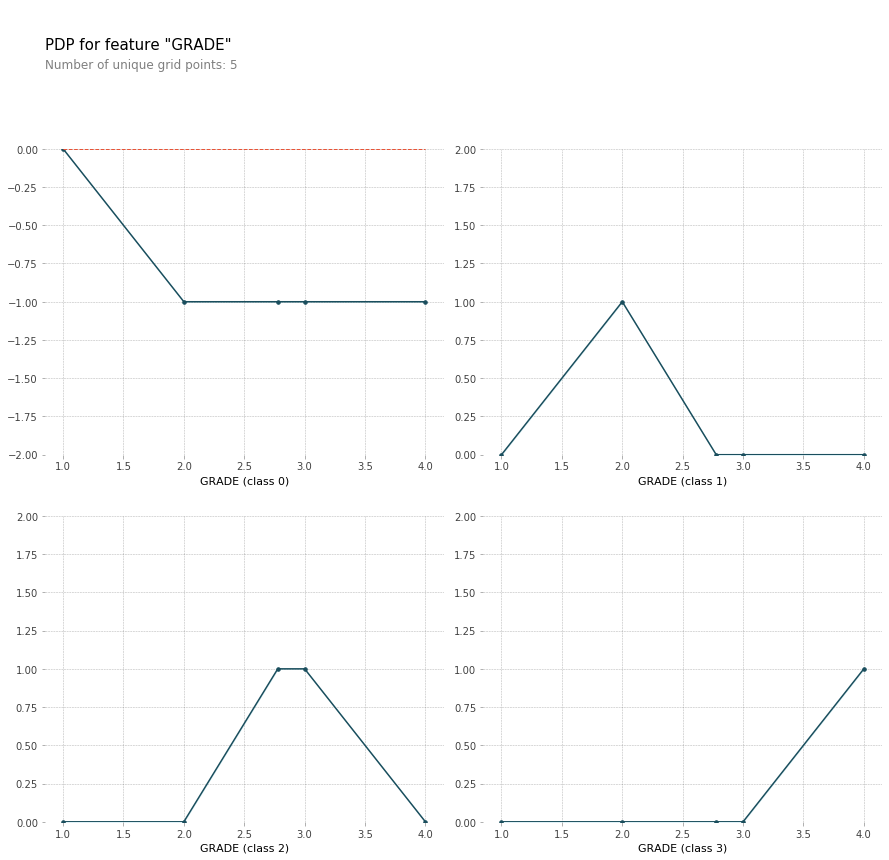

In [7]:
pdp.pdp_plot(pdp_goals, 'GRADE')
plt.show()


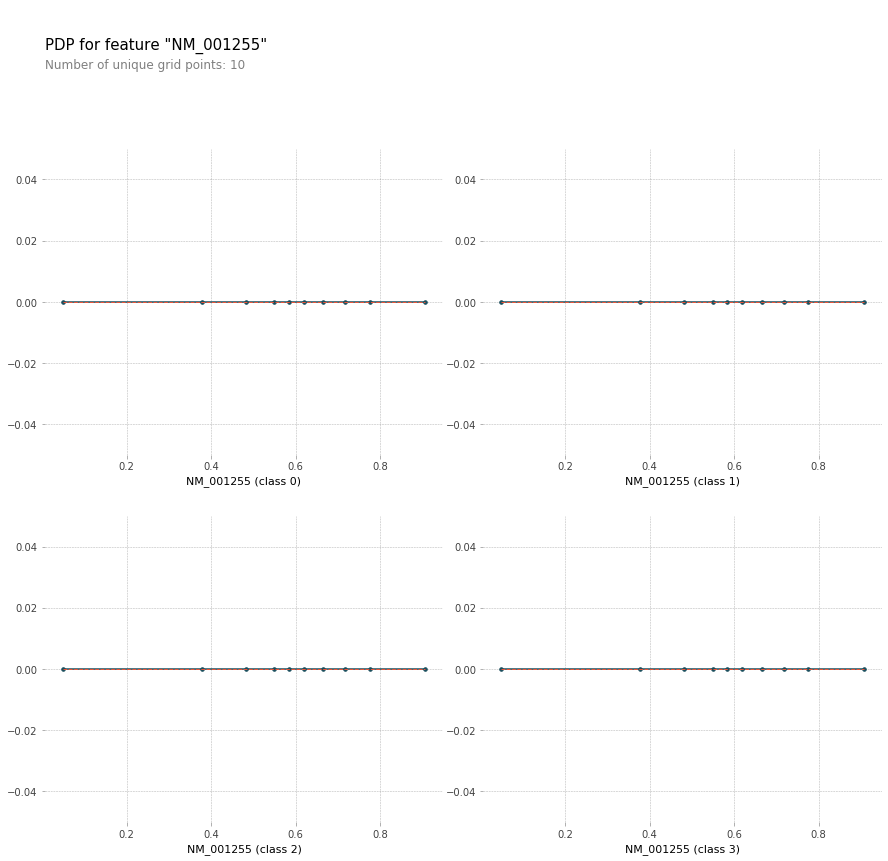

In [8]:
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature='NM_001255')
pdp.pdp_plot(pdp_goals, 'NM_001255')
plt.show()

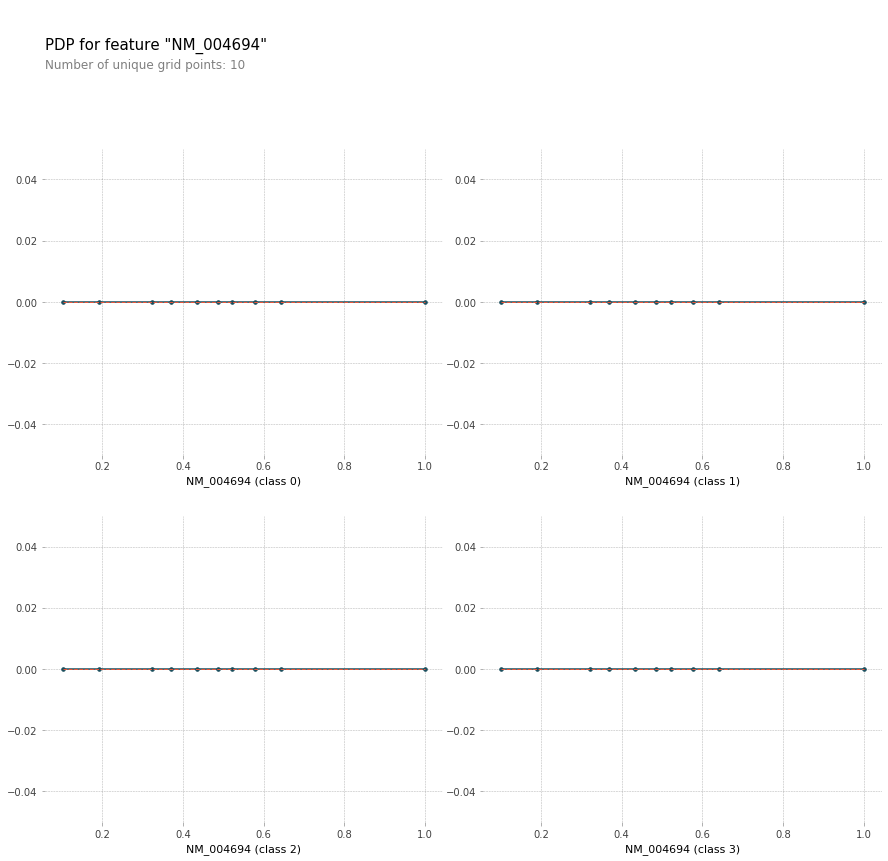

In [9]:

pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature='NM_004694')
pdp.pdp_plot(pdp_goals, 'NM_004694')
plt.show()


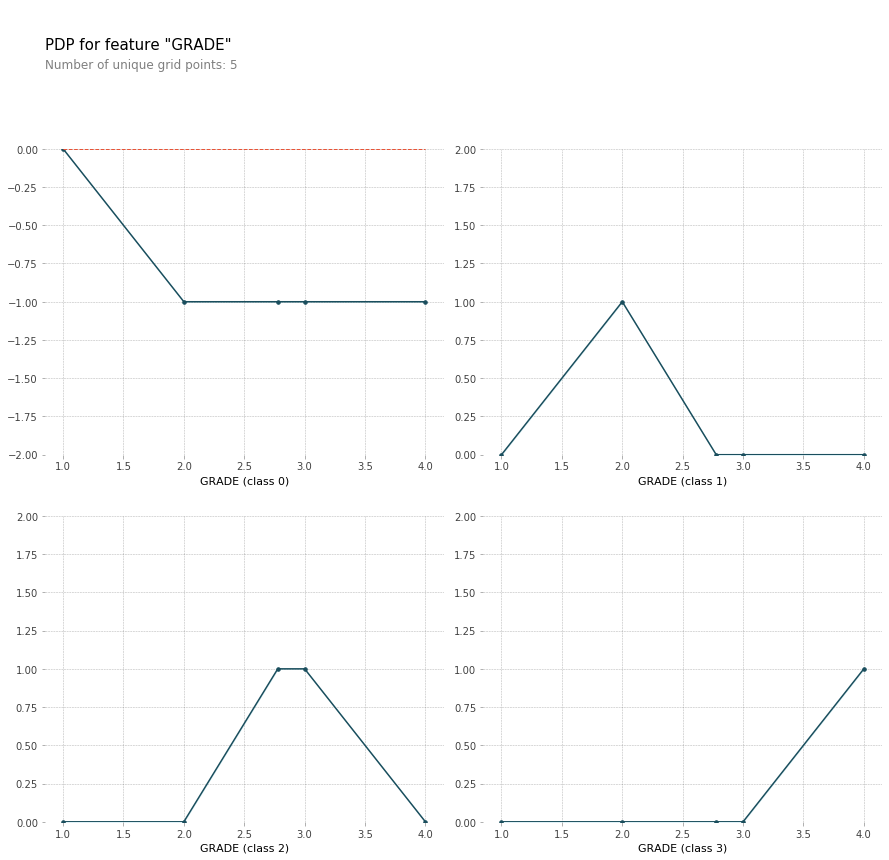

In [10]:
feature_to_plot = 'GRADE'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

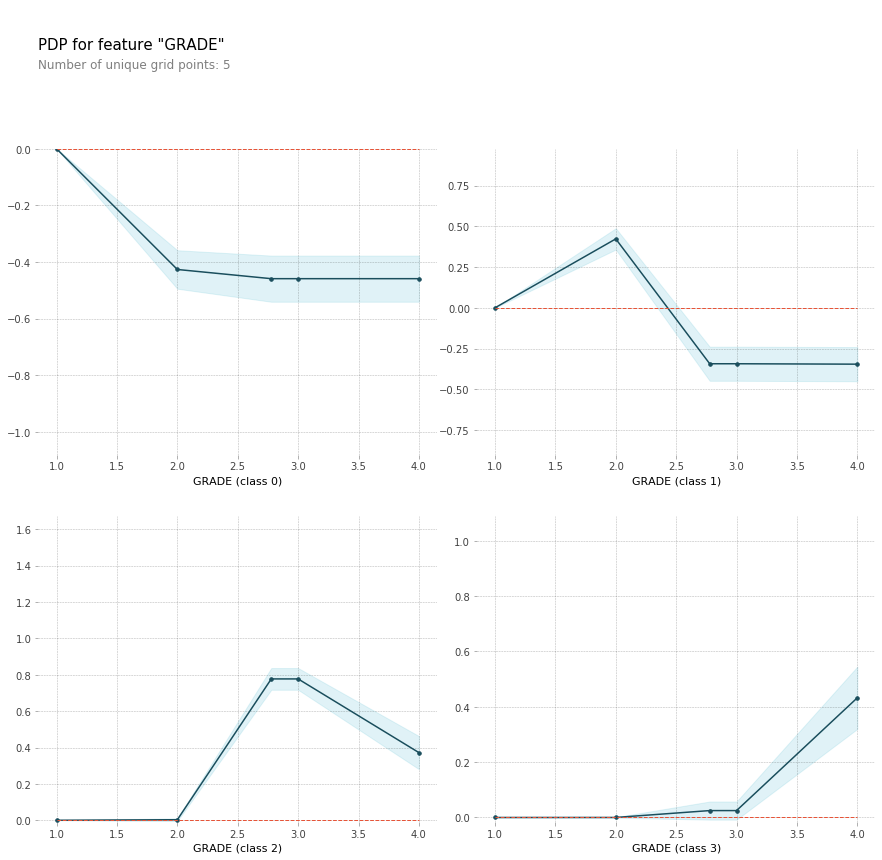

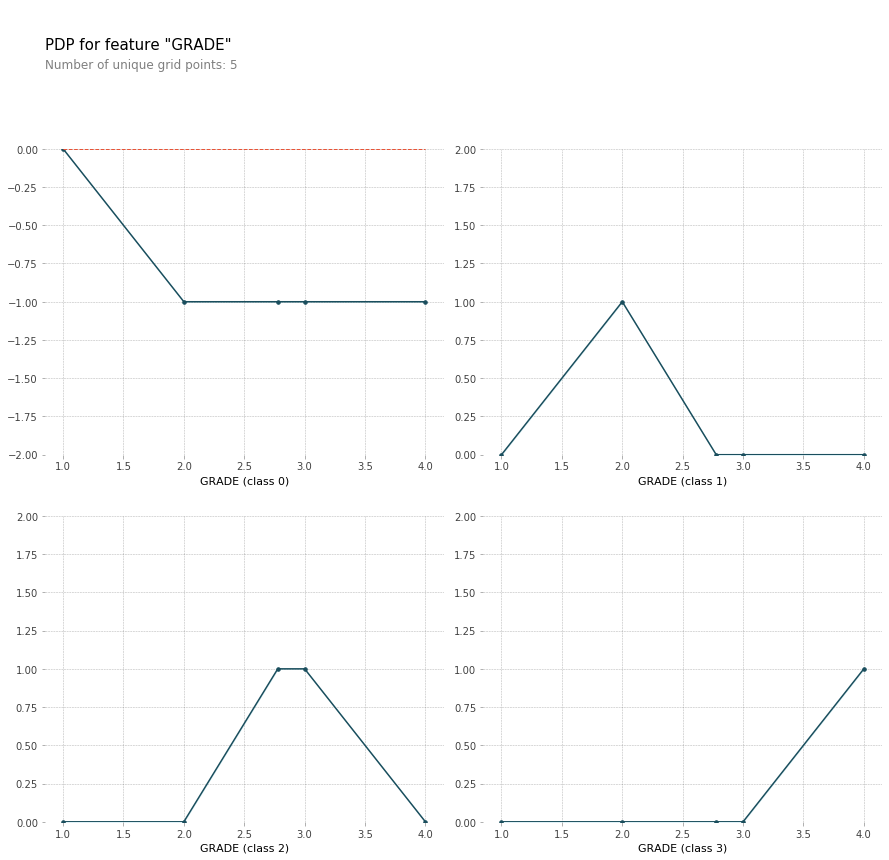

In [11]:
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

feature_to_plot = 'GRADE'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()




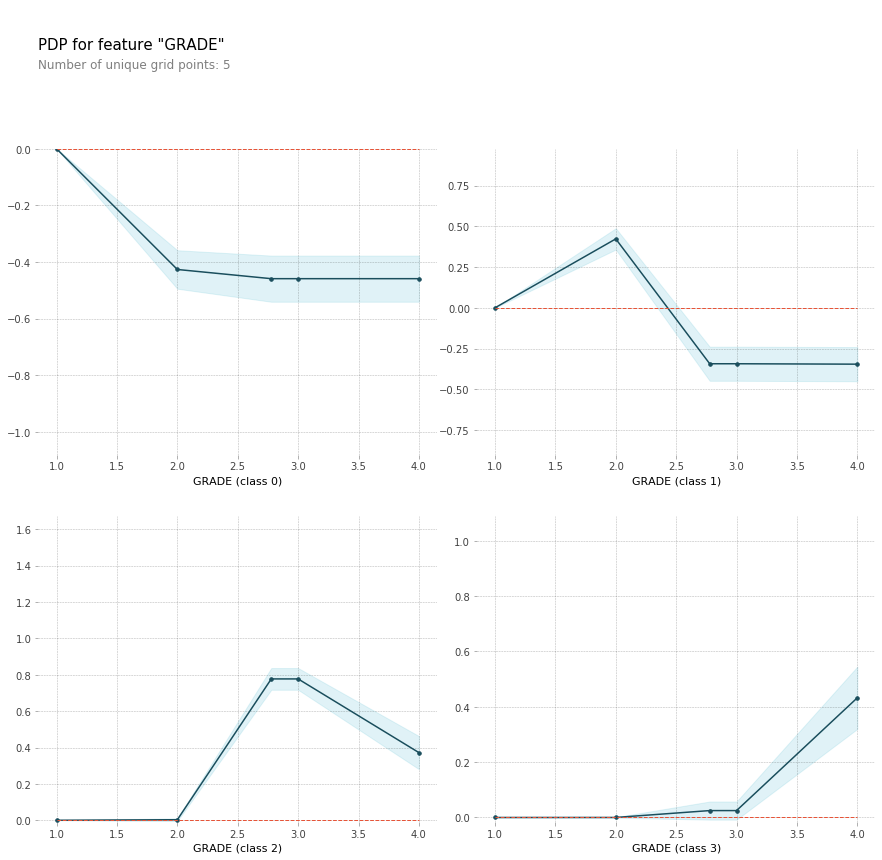

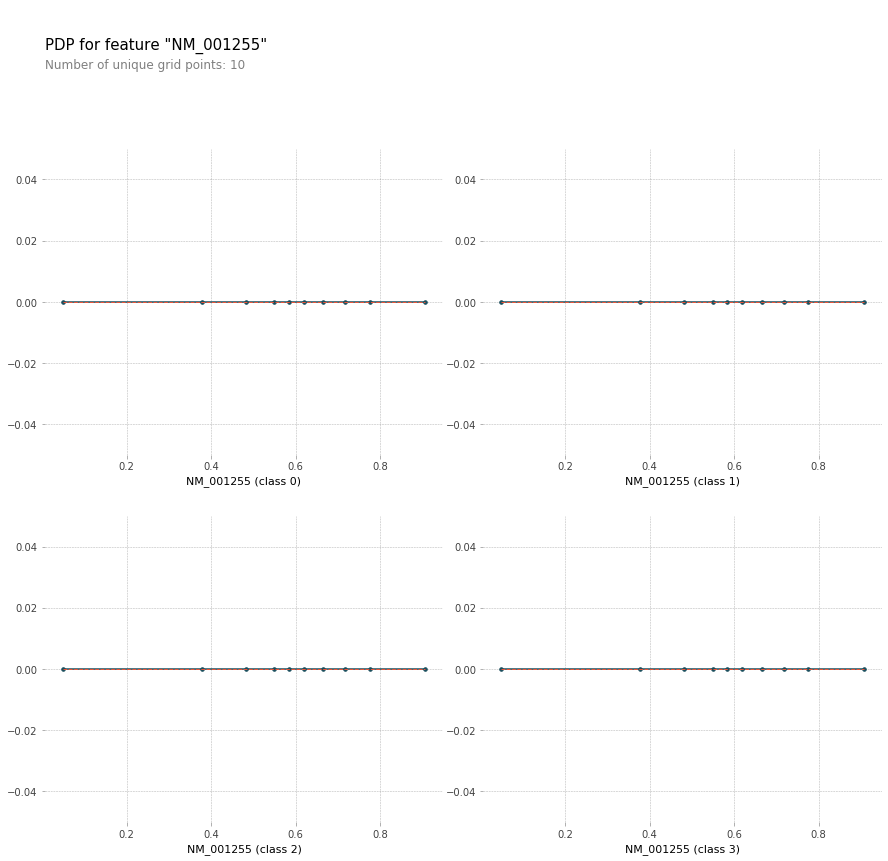

In [12]:
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

feature_to_plot = 'NM_001255'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()




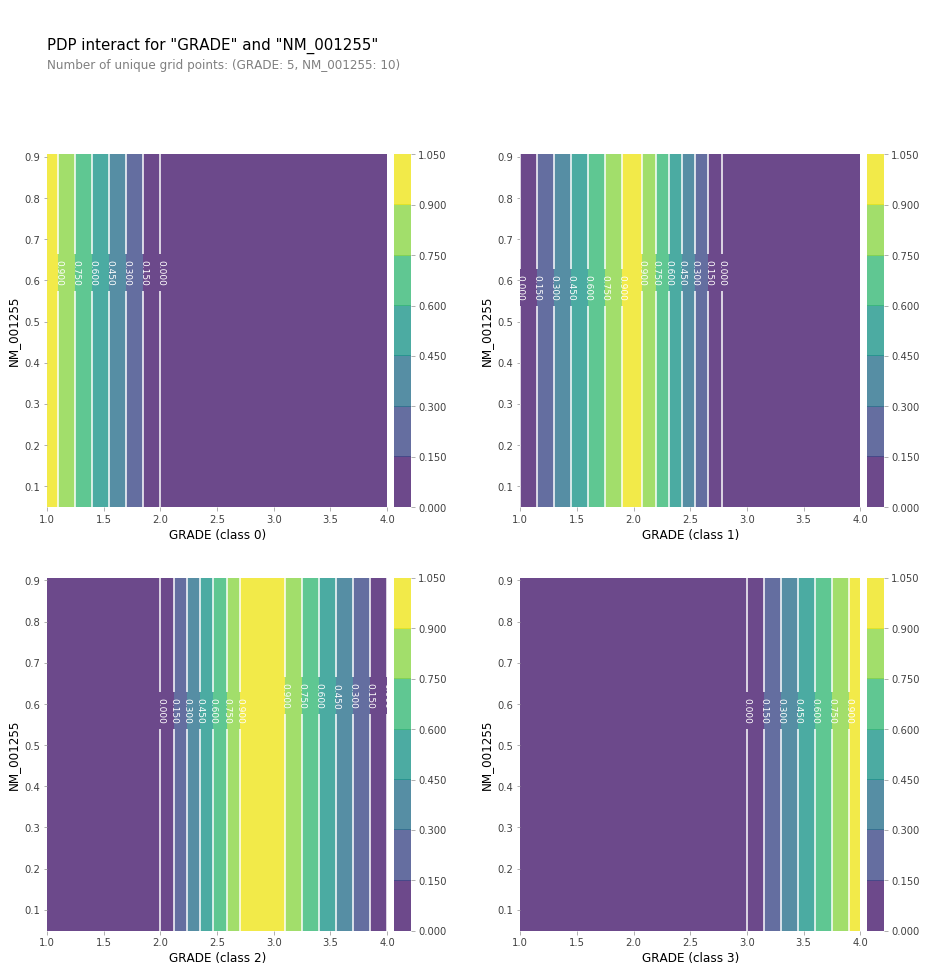

In [14]:
features_to_plot = ['GRADE', 'NM_001255']
inter1  =  pdp.pdp_interact(model=tree_model, dataset=val_X, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()